Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

                 name  num_friends
0    Evelyn Jefferson           17
1    Laura Mandeville           15
2    Theresa Anderson           17
3       Brenda Rogers           15
4    Charlotte McDowd           11
5    Frances Anderson           15
6         Eleanor Nye           15
7    Pearl Oglethorpe           16
8         Ruth DeSand           17
9     Verne Sanderson           17
10 

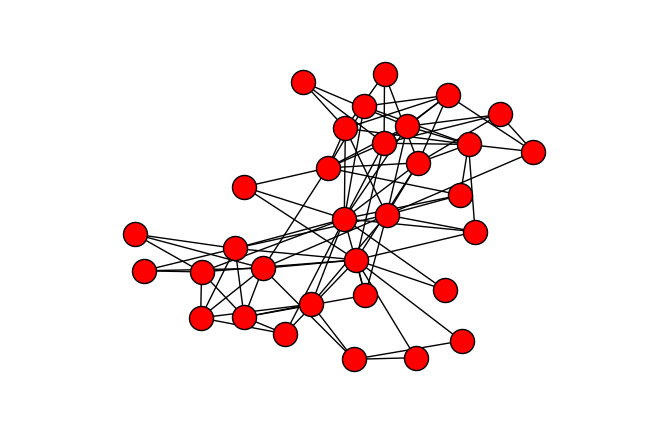

Projected Graph


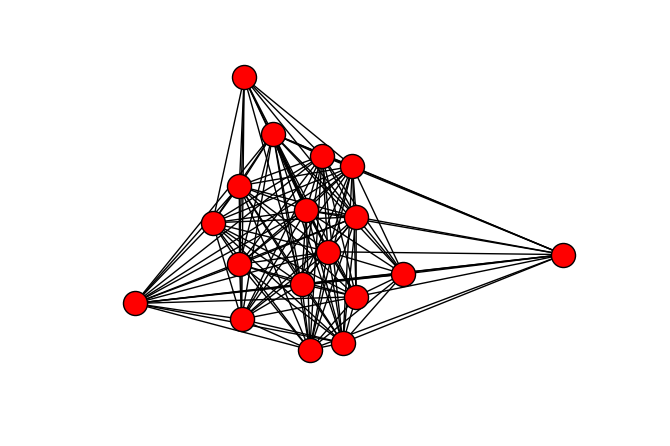

Weighted Projected Graph


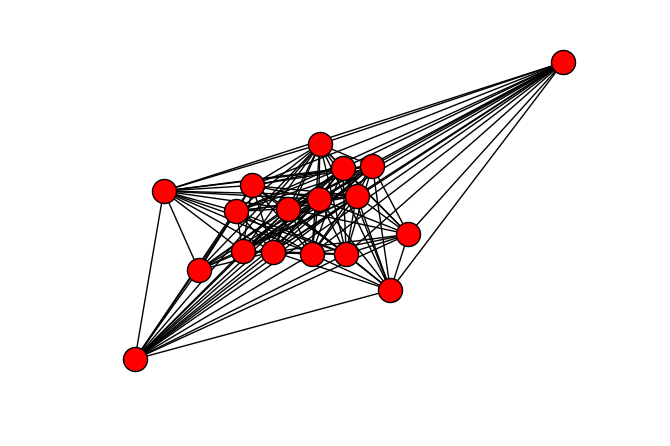

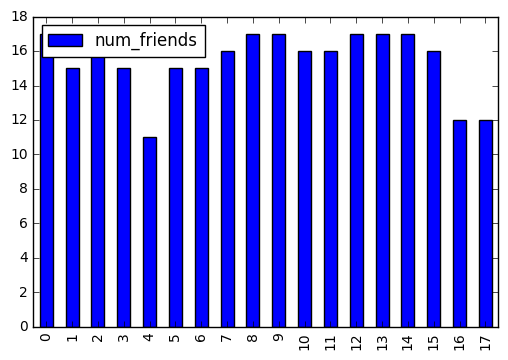

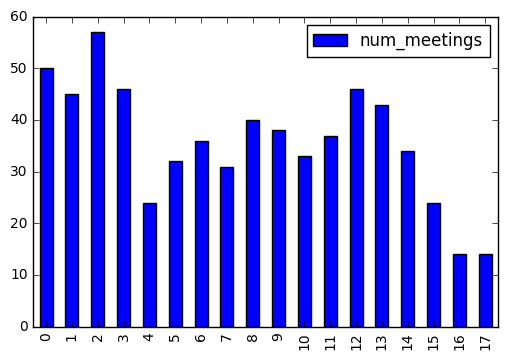

In [17]:
"""
Draw a graph with matplotlib.
You must have matplotlib for this to work.
"""
try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx
import numpy as np
import pandas as pd

# data is a part of networkx's core package
# the following code was borrowed and modified from the networkx github site
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()

# extract Node types
women = G.graph['top']
clubs = G.graph['bottom']

# show the relationship "through" club nodes
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))

# project bipartite graph onto women nodes
W1 = bipartite.projected_graph(G, women)
print('')
friend_counts = []
for w in women:
    friend_counts.append(W1.degree(w))

women_df = pd.DataFrame({'num_friends' : friend_counts,'name' : women})
print women_df
    
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W2 = bipartite.weighted_projected_graph(G, women)
print('')
friend_meetings = []
for w in women:
    friend_meetings.append(W2.degree(w,weight='weight'))
    
meetings_df = pd.DataFrame({'num_meetings' : friend_meetings,'name' : women})
print meetings_df
    
print('')
print('')
print('Summary Statistics for Friend Counts')
print('Max: %d' % min(friend_counts))
print('Max: %d' % max(friend_counts))
print('Avg: %d' % np.mean(friend_counts))
print('Std: %d' % np.std(friend_counts))

print('')
# plot original graph
print('Original Graph')
nx.draw(G)
plt.show()

# plot projected graph
print('Projected Graph')
nx.draw(W1)
plt.show()

print('Weighted Projected Graph')
# plot weighted projected graph
nx.draw(W2)
plt.show()

women_df.plot.bar(); 
plt.show()

meetings_df.plot.bar(); 
plt.show()

Observations:  As evidenced by the visuals and summary statistics, this group of women are very interconnected with many common friends.  Nobody is friends with fewer than 11 of the 18 women in the group.  This strikes me as a very high percentage.

The number of meetings varies more per woman.  In other words, even though levels of friendship are similar among the women, desire to engage in events and activities may vary more.  To me this is reflective of a typical social circle.  Those in a given social circle generally enjoy the group members but different personalities (introverted vs. extroverted for example) dictate different desired activity levels.